In [1]:
from google.colab import files
uploaded = files.upload()

Saving car data.csv to car data.csv


Dataset Loaded Successfully!

  Car_Name  Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Selling_type Transmission  Owner  
0       Dealer       Manual      0  
1       Dealer       Manual      0  
2       Dealer       Manual      0  
3       Dealer       Manual      0  
4       Dealer       Manual      0  

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_

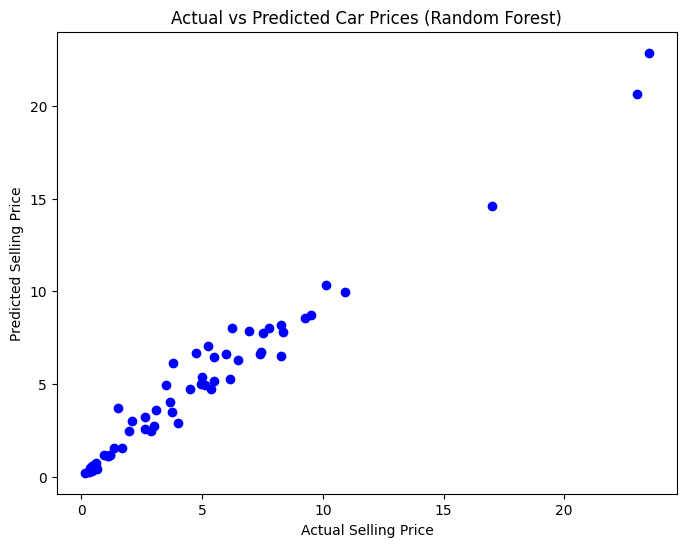

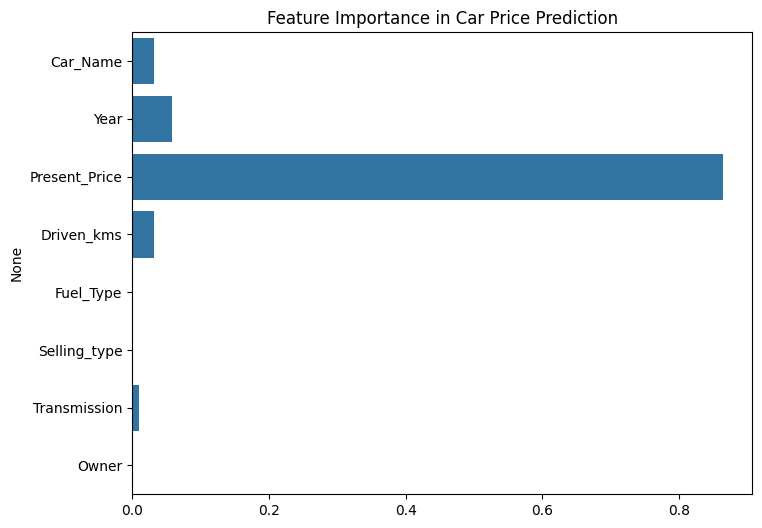


Predicted Price for Example Car: 0.44


In [3]:
#Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Load the Dataset
df = pd.read_csv("car data.csv")
print("Dataset Loaded Successfully!\n")

# Display first 5 rows
print(df.head())

#Basic Data Exploration
print("\nDataset Information:")
print(df.info())

print("\nChecking Missing Values:")
print(df.isnull().sum())

print("\nStatistical Summary:")
print(df.describe())

#Data Preprocessing
# Check for categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
print("\nCategorical Columns:", list(categorical_cols))

# Encode categorical variables using LabelEncoder
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

print("\nAfter Encoding:")
print(df.head())

# Feature Selection
# Separate independent (X) and dependent (y) variables
X = df.drop("Selling_Price", axis=1)
y = df["Selling_Price"]

# Split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nData Splitting Done:")
print("Training Data Shape:", X_train.shape)
print("Testing Data Shape:", X_test.shape)

#Model Training
#Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

#Model Evaluation

def evaluate_model(y_true, y_pred, model_name):
    print(f"\n----- {model_name} Evaluation -----")
    print("R² Score:", r2_score(y_true, y_pred))
    print("Mean Absolute Error:", mean_absolute_error(y_true, y_pred))
    print("Mean Squared Error:", mean_squared_error(y_true, y_pred))
    print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_true, y_pred)))

evaluate_model(y_test, rf_pred, "Random Forest")

# Visualisation
# Actual vs Predicted (Random Forest)
plt.figure(figsize=(8,6))
plt.scatter(y_test, rf_pred, color='blue')
plt.xlabel("Actual Selling Price")
plt.ylabel("Predicted Selling Price")
plt.title("Actual vs Predicted Car Prices (Random Forest)")
plt.show()

# Feature Importance
plt.figure(figsize=(8,6))
importances = rf_model.feature_importances_
sns.barplot(x=importances, y=X.columns)
plt.title("Feature Importance in Car Price Prediction")
plt.show()

# Real-World Application
# Example: Predicting price for a new car
sample_input = X_test.iloc[0:1]
predicted_price = rf_model.predict(sample_input)
print("\nPredicted Price for Example Car:", round(predicted_price[0], 2))
